# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [4]:
df = pd.read_csv("/Users/isaganijulian/Downloads/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
print(df['booking_origin'].unique())

['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua' 'Maldives' 'Egypt' 'Israel' 'Tunisia'
 'South Africa' 'Papua New Guinea' 'Paraguay' 'Estonia

In [6]:
unique_route = (df['route'].unique())
print(unique_route)

['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKKIX' 'CGKKTM' 'CGKMEL' 'CGKMRU' 'CGKOOL'
 'CGKPEK' 'CGKPER' 'CGKPUS' 'CGKPVG' 'CGKSYD' 'CGKT

In [7]:
# Drop unecessary columns
df = df.drop(columns=['route', 'booking_origin'])

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 4.6+ MB


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [9]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [11]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [13]:
# Identify null
print(df.isnull().sum())

# Identify duplicates
print(df.duplicated().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64
757


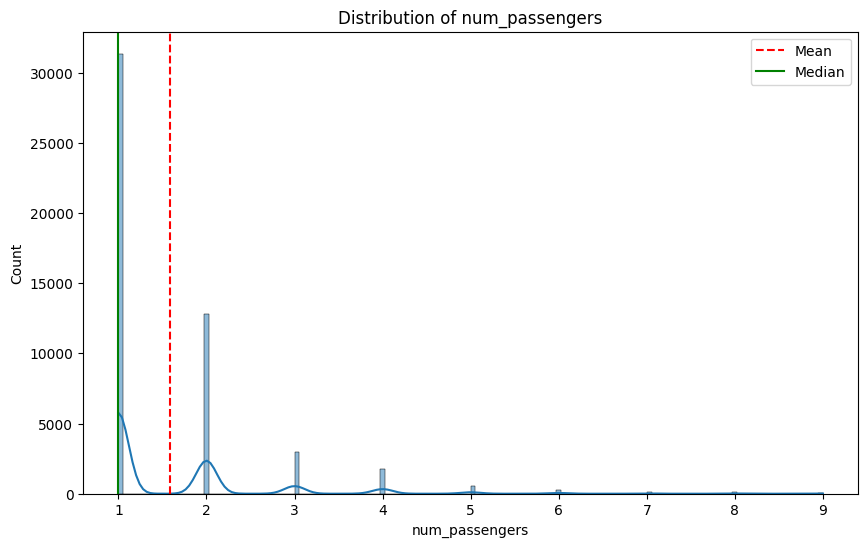

Skewness: 2.69
Kurtosis: 10.06



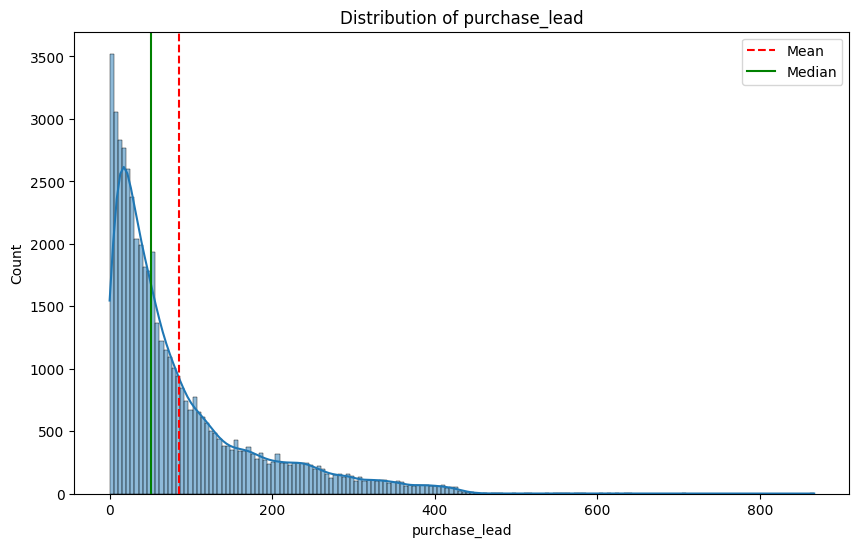

Skewness: 1.65
Kurtosis: 2.49



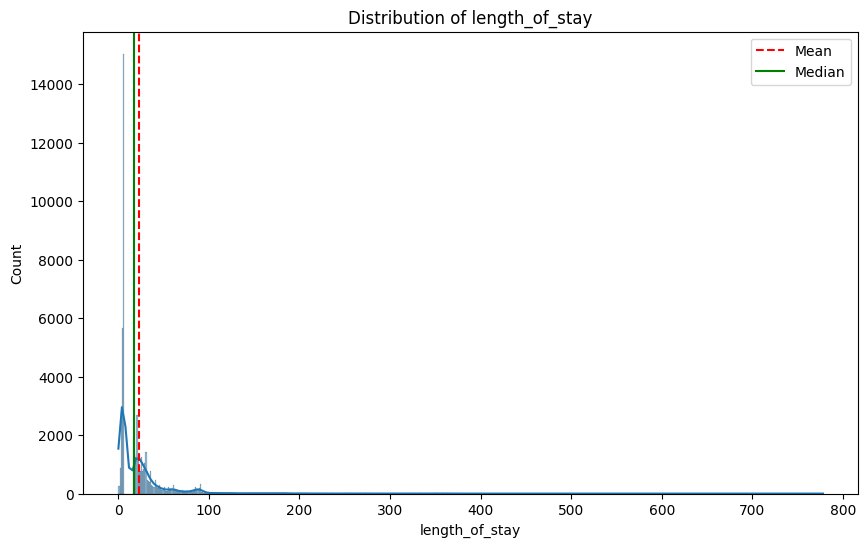

Skewness: 5.27
Kurtosis: 48.81



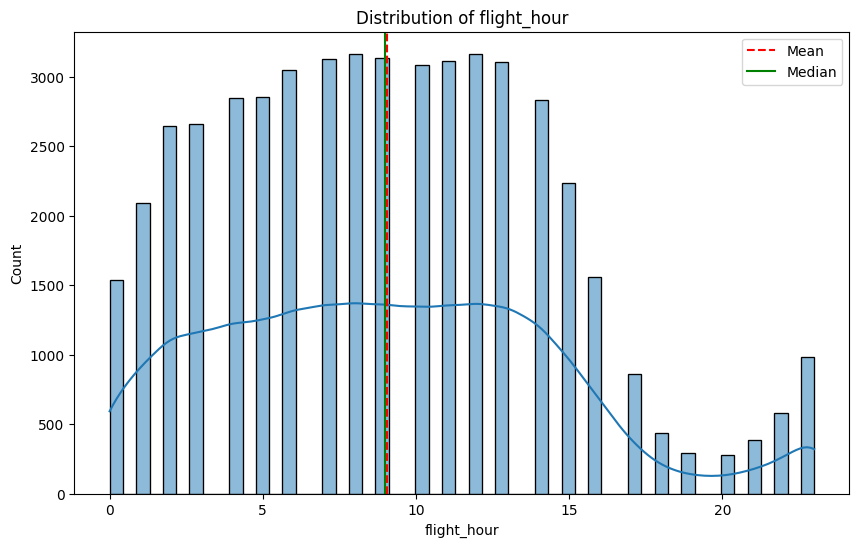

Skewness: 0.40
Kurtosis: -0.30



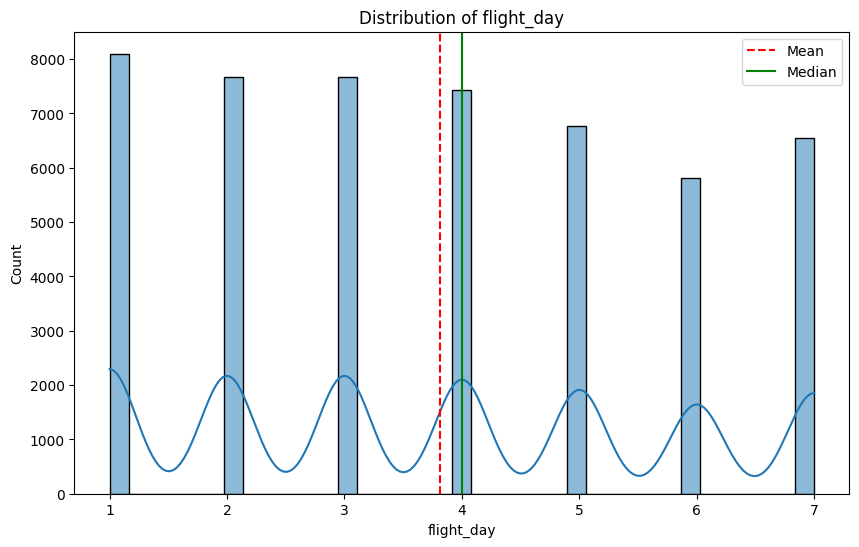

Skewness: 0.13
Kurtosis: -1.20



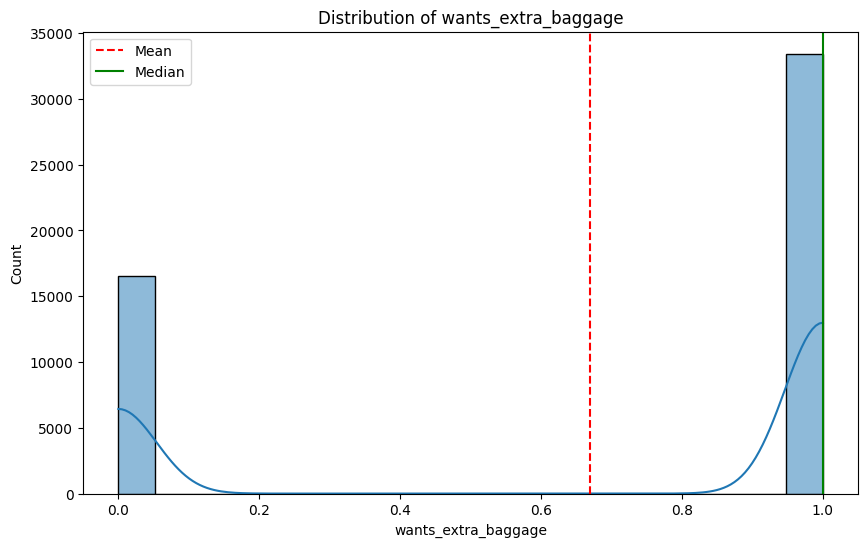

Skewness: -0.72
Kurtosis: -1.49



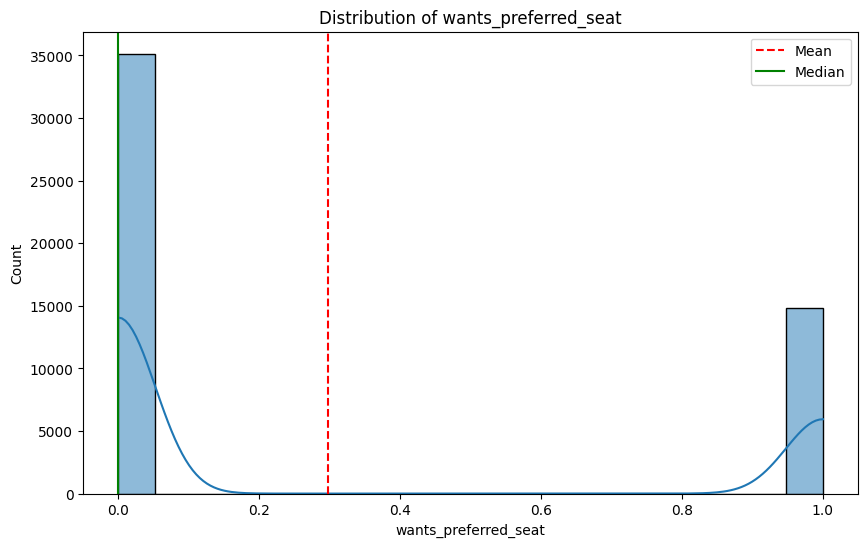

Skewness: 0.89
Kurtosis: -1.21



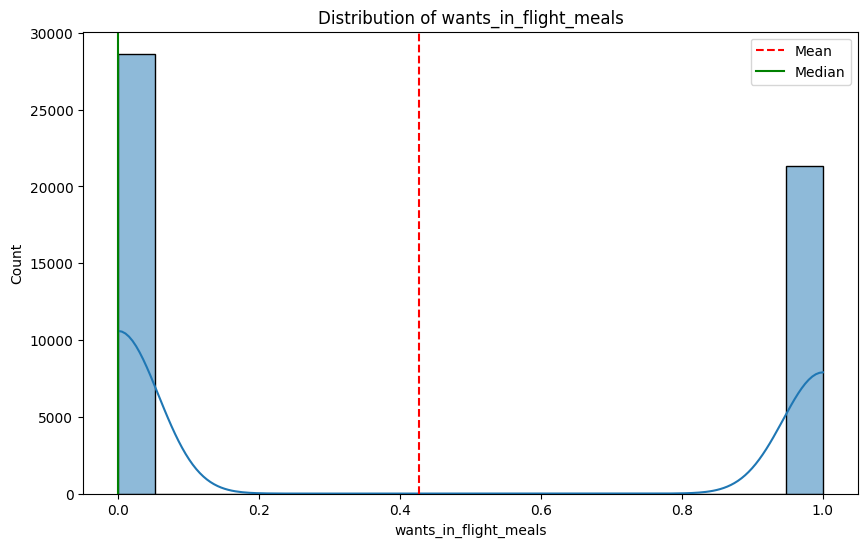

Skewness: 0.29
Kurtosis: -1.91



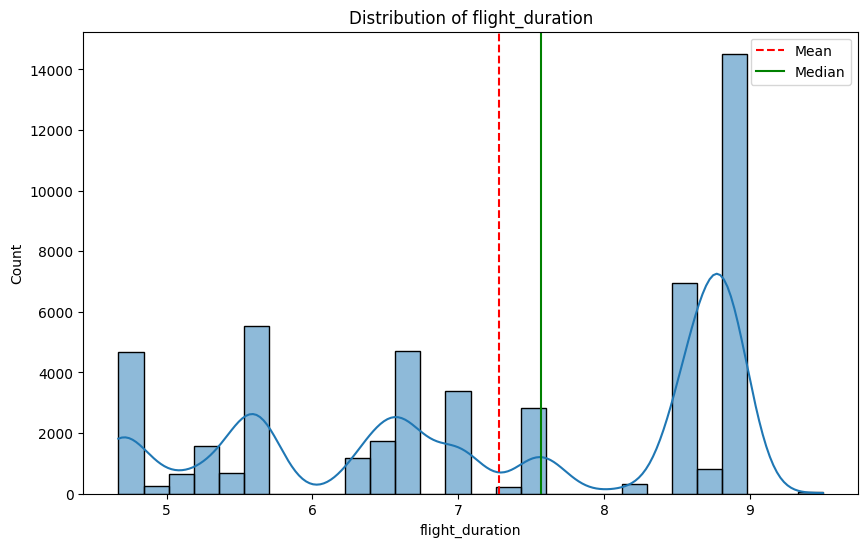

Skewness: -0.36
Kurtosis: -1.37



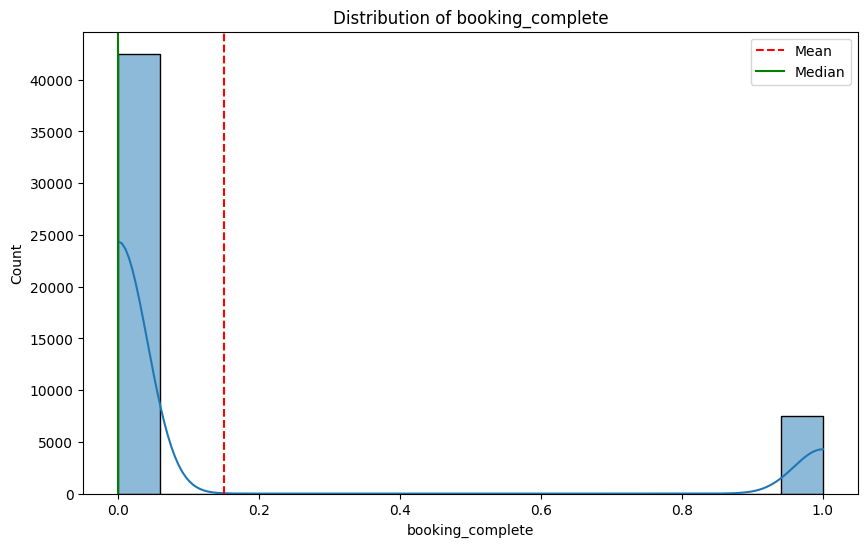

Skewness: 1.97
Kurtosis: 1.86



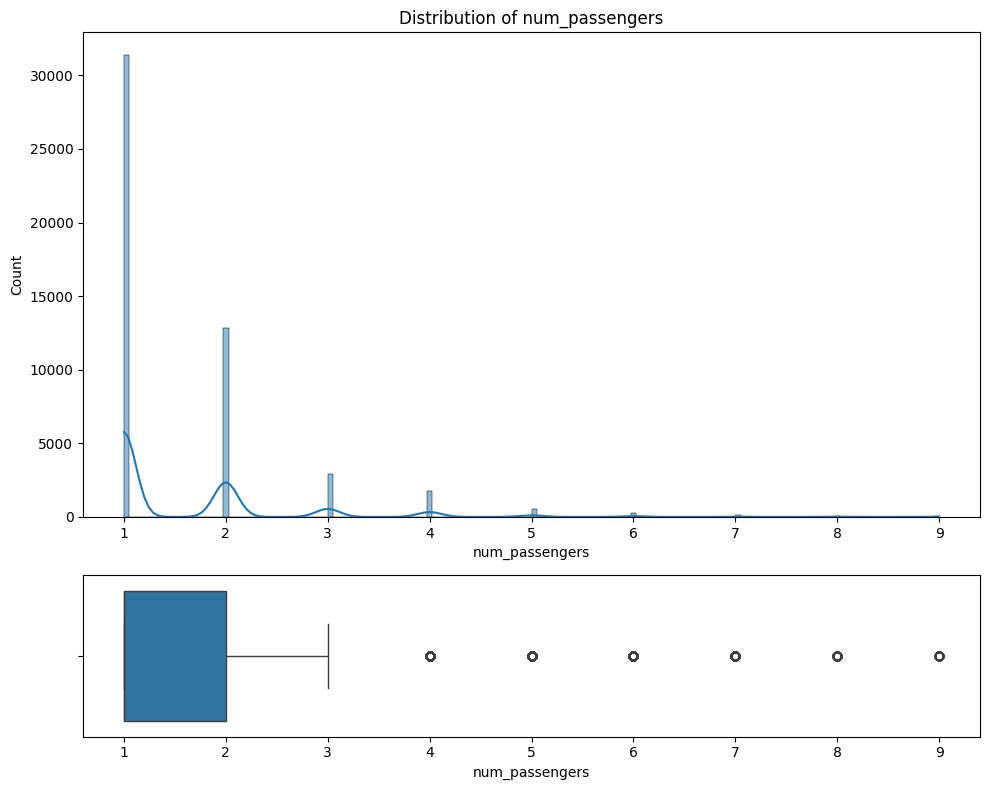

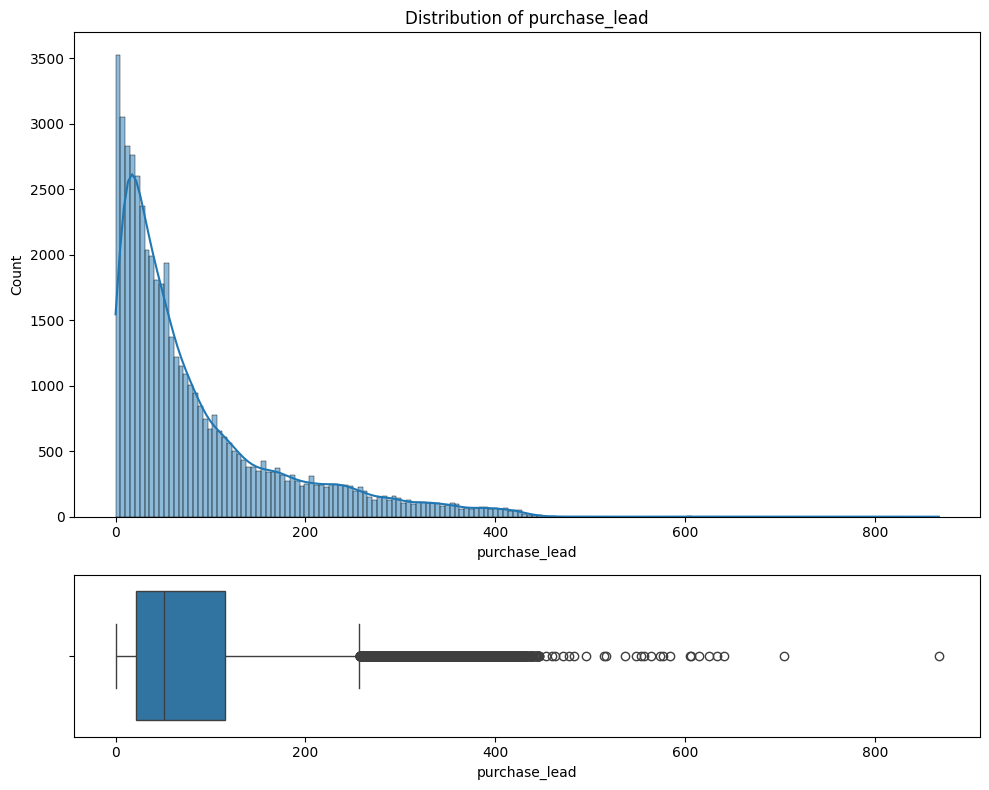

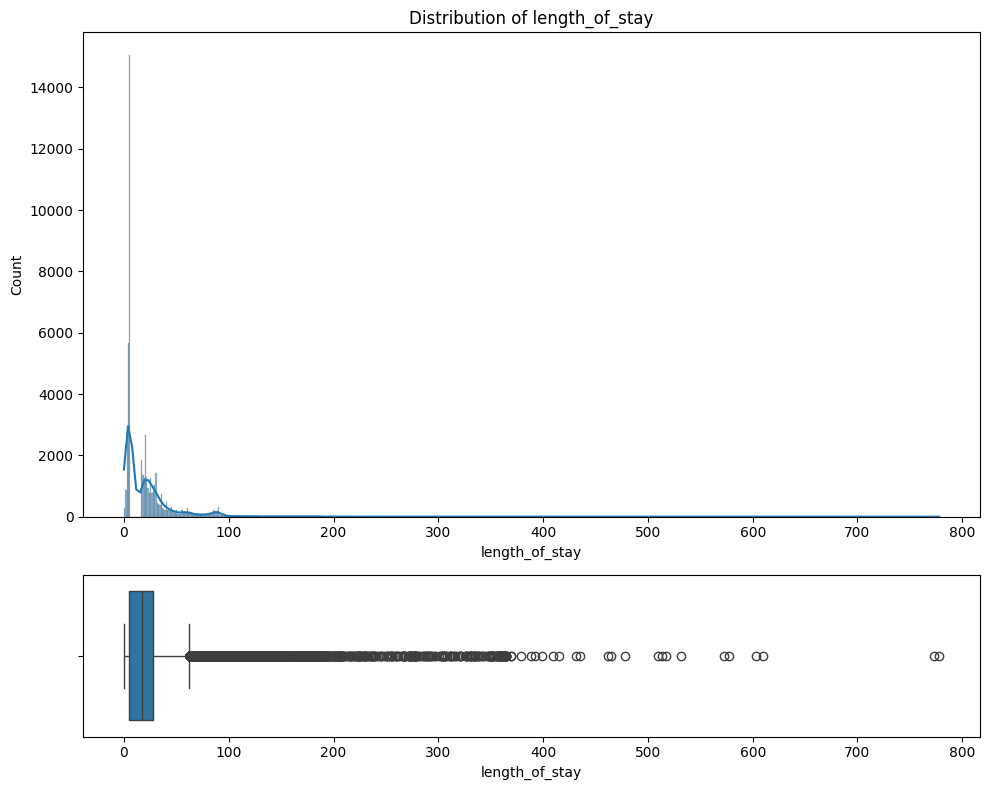

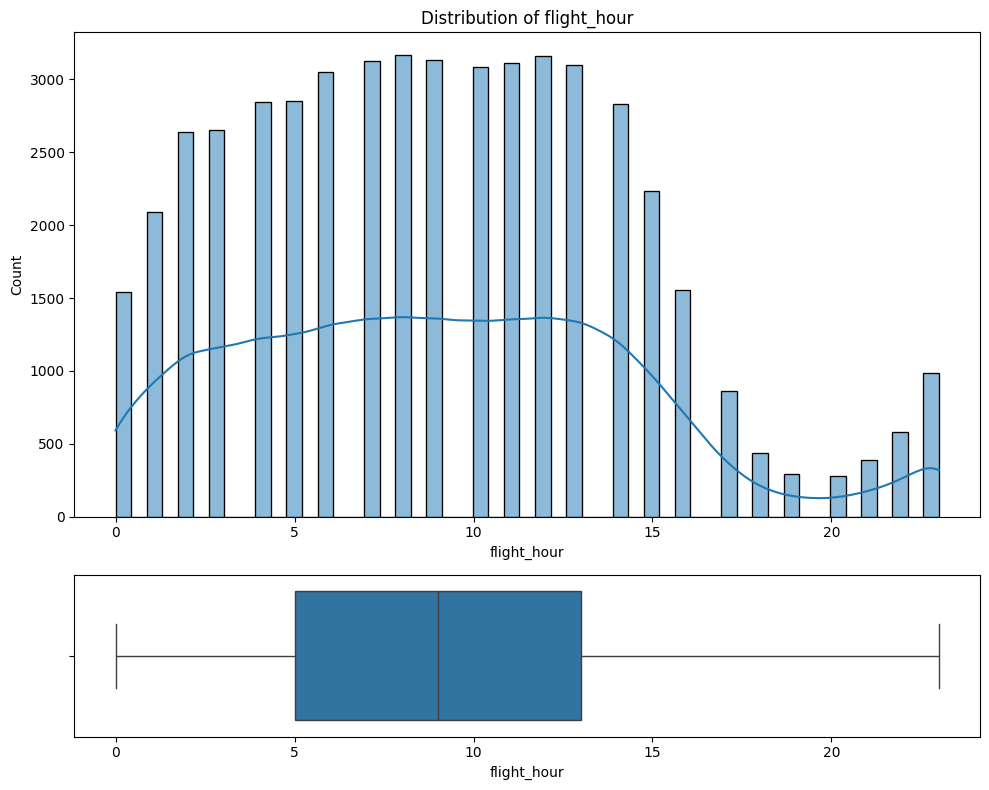

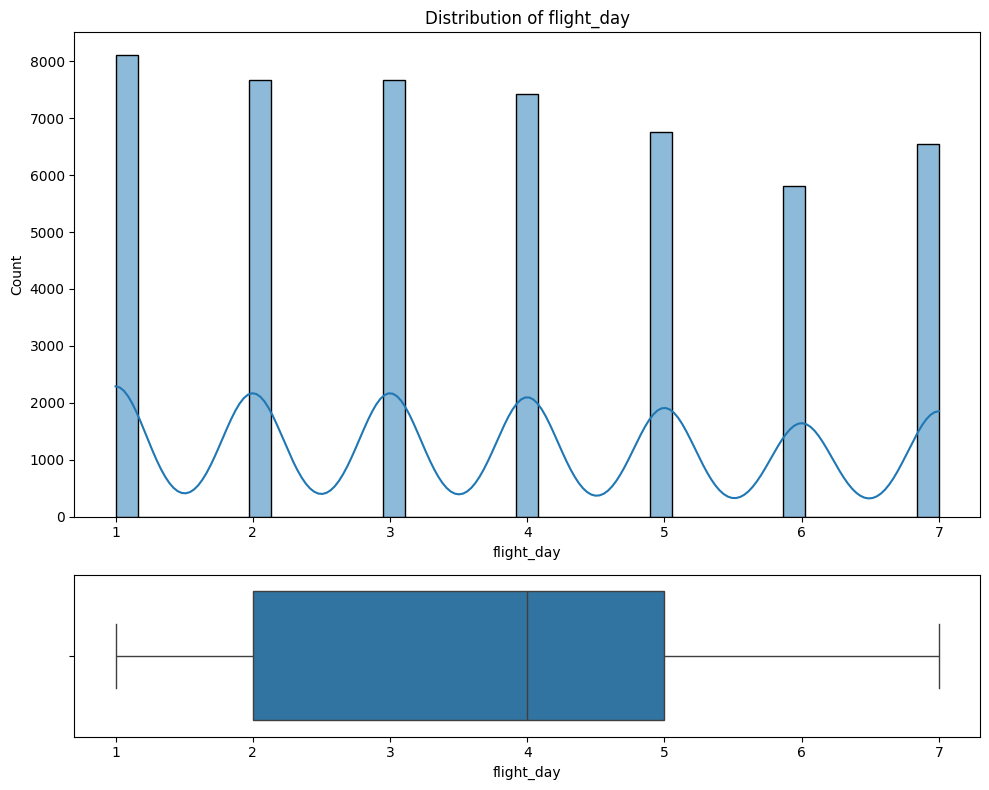

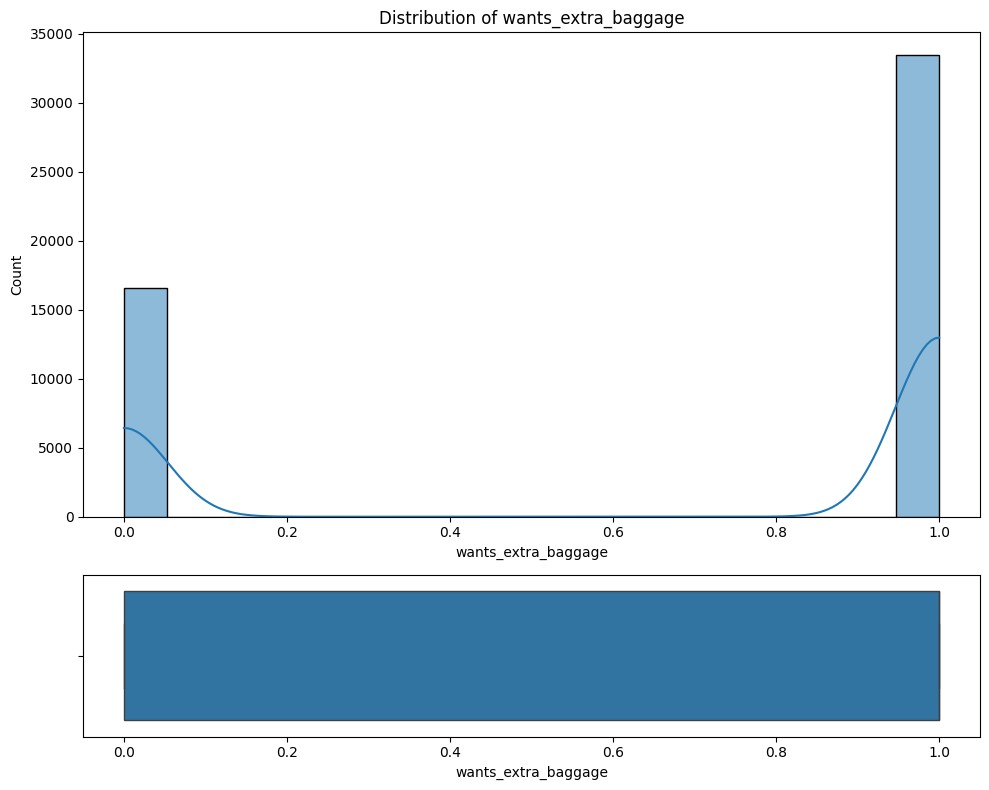

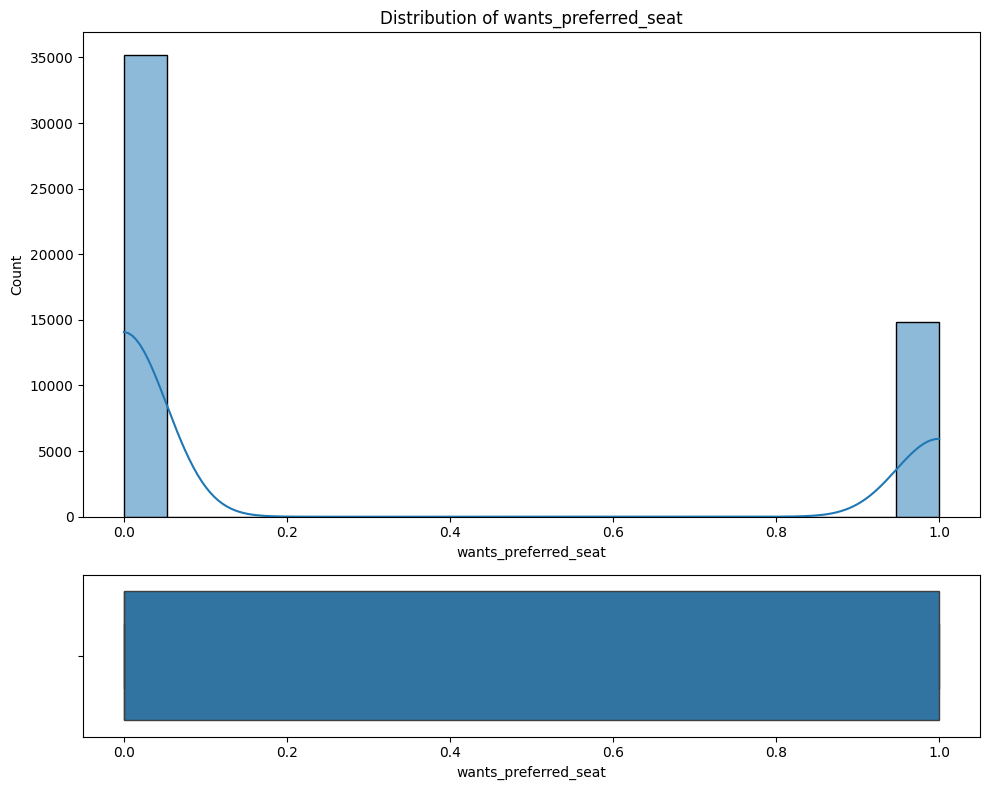

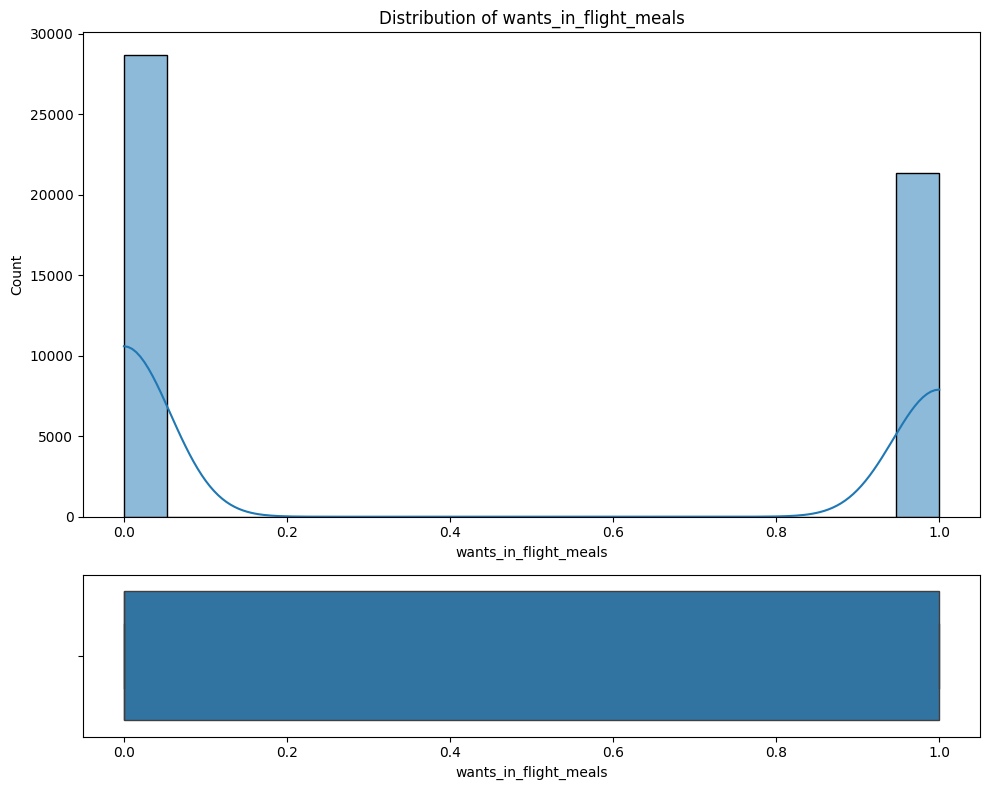

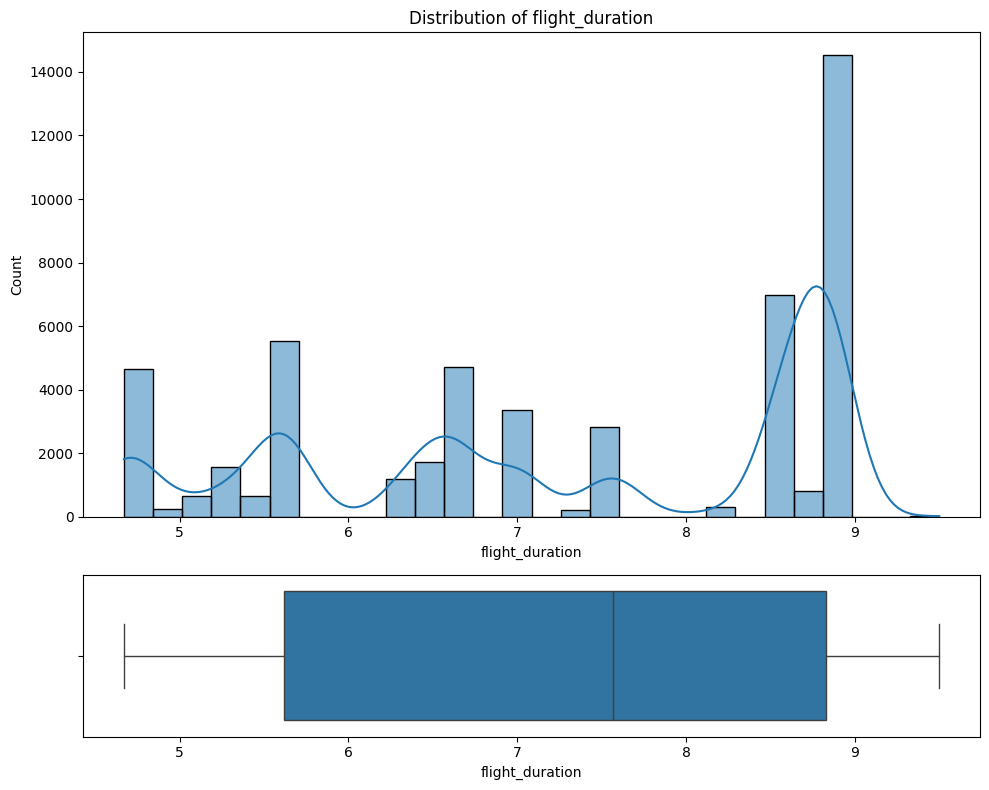

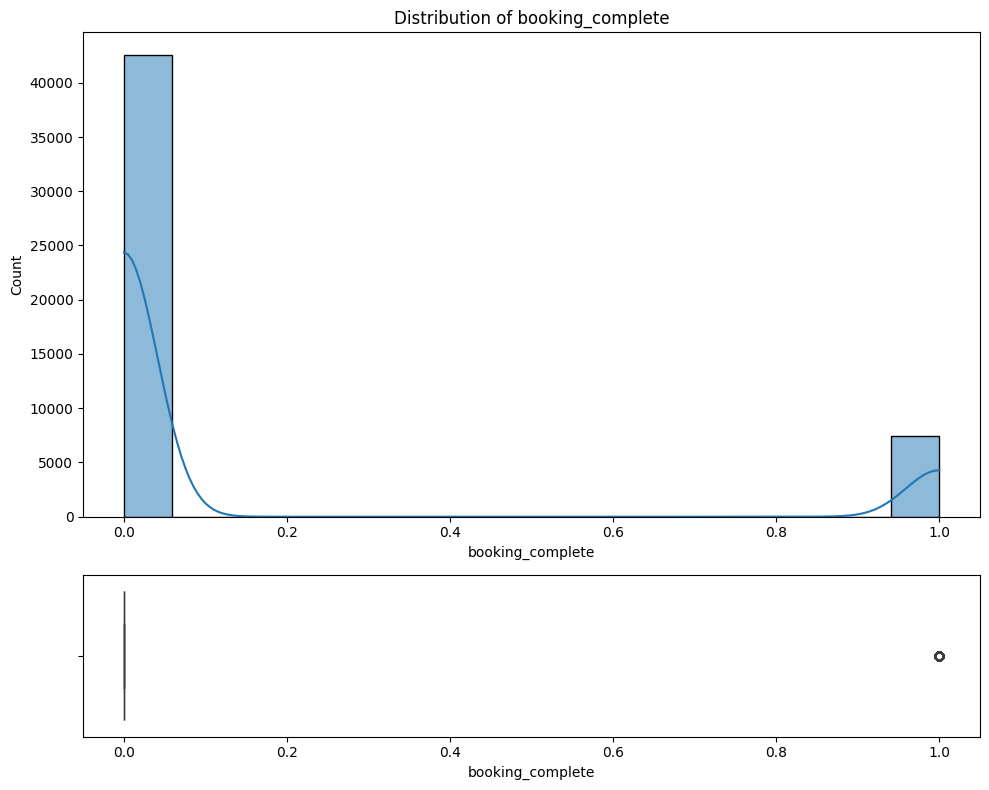

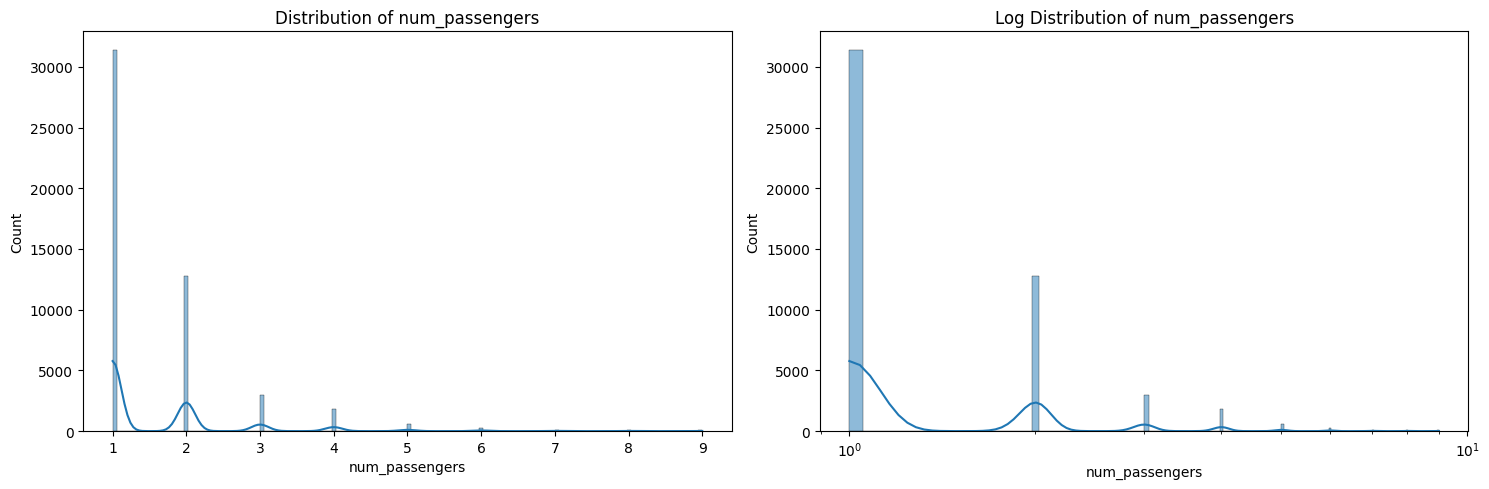

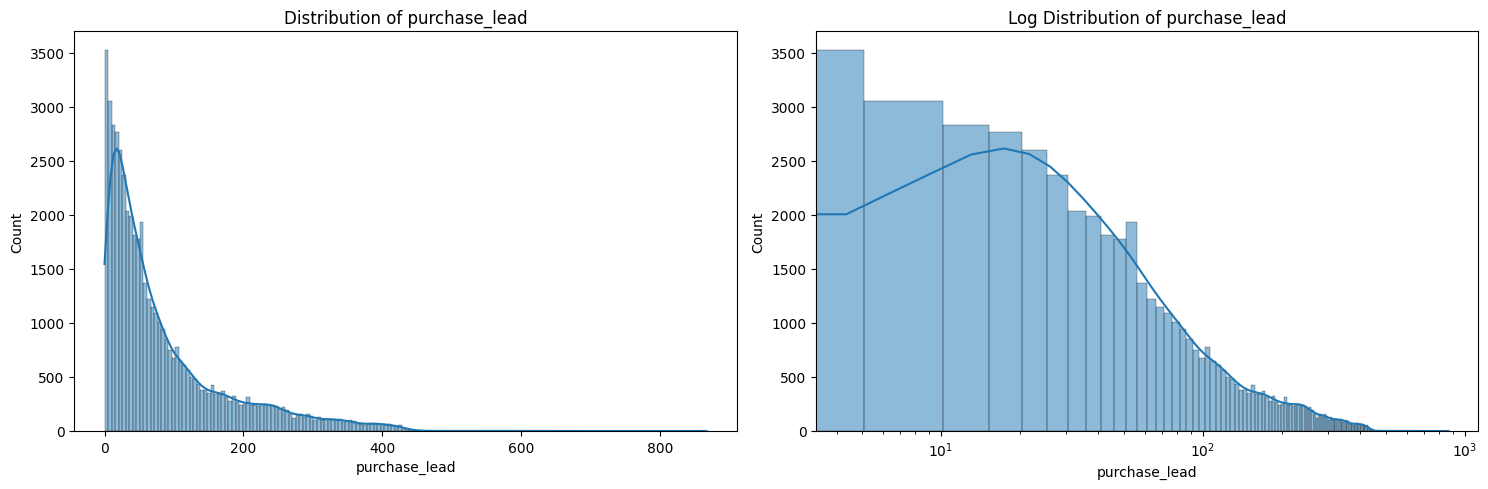

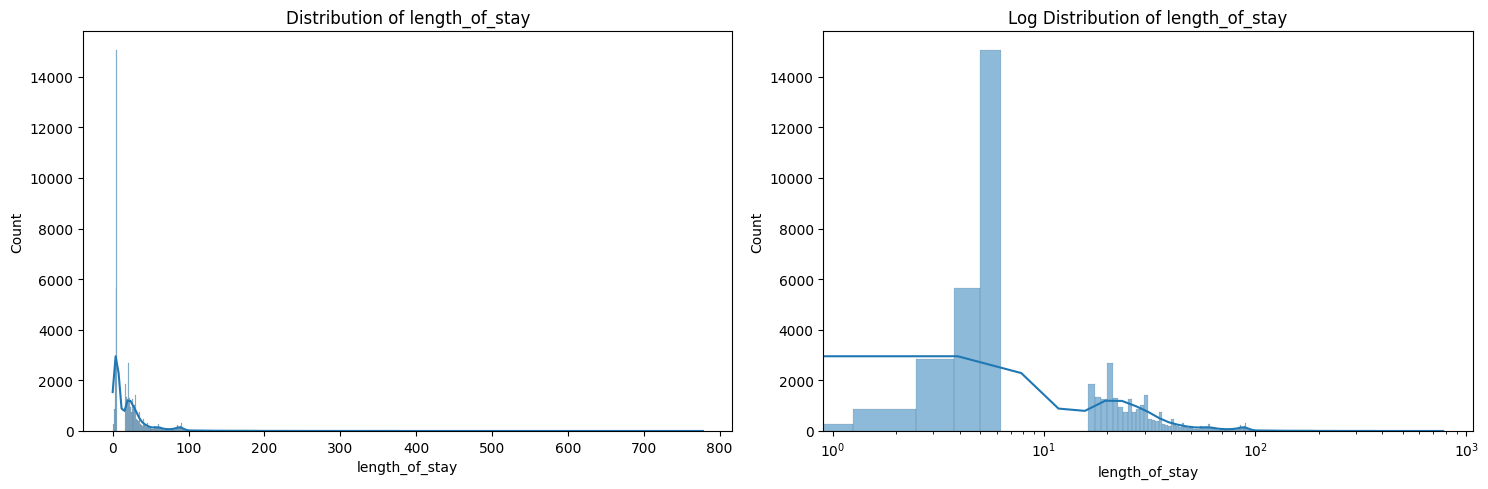

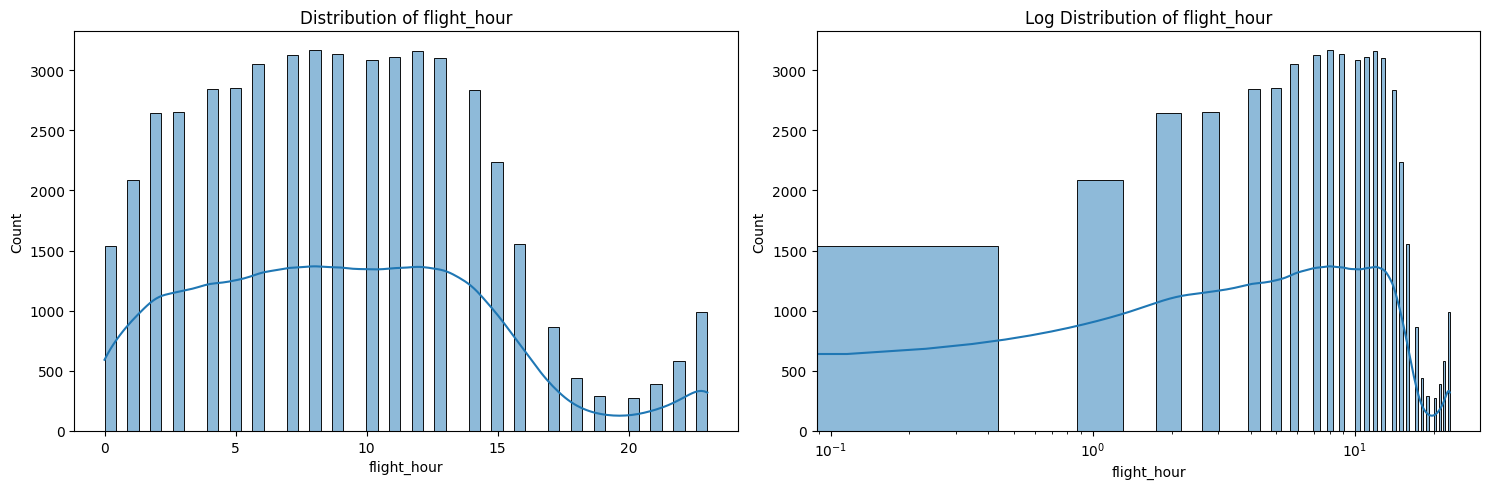

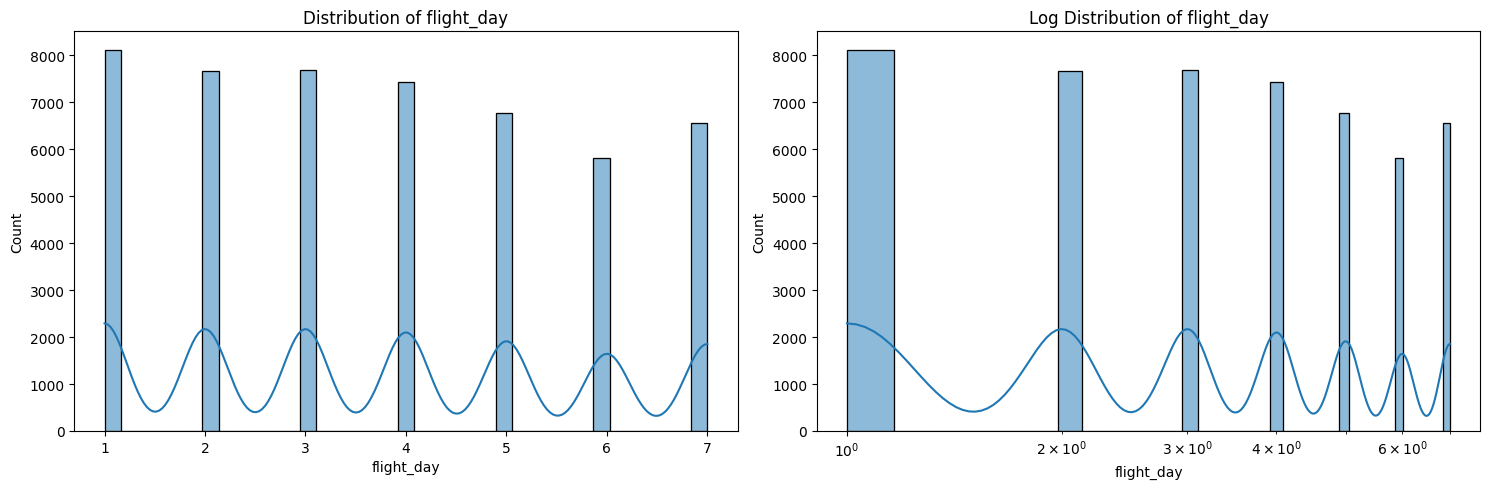

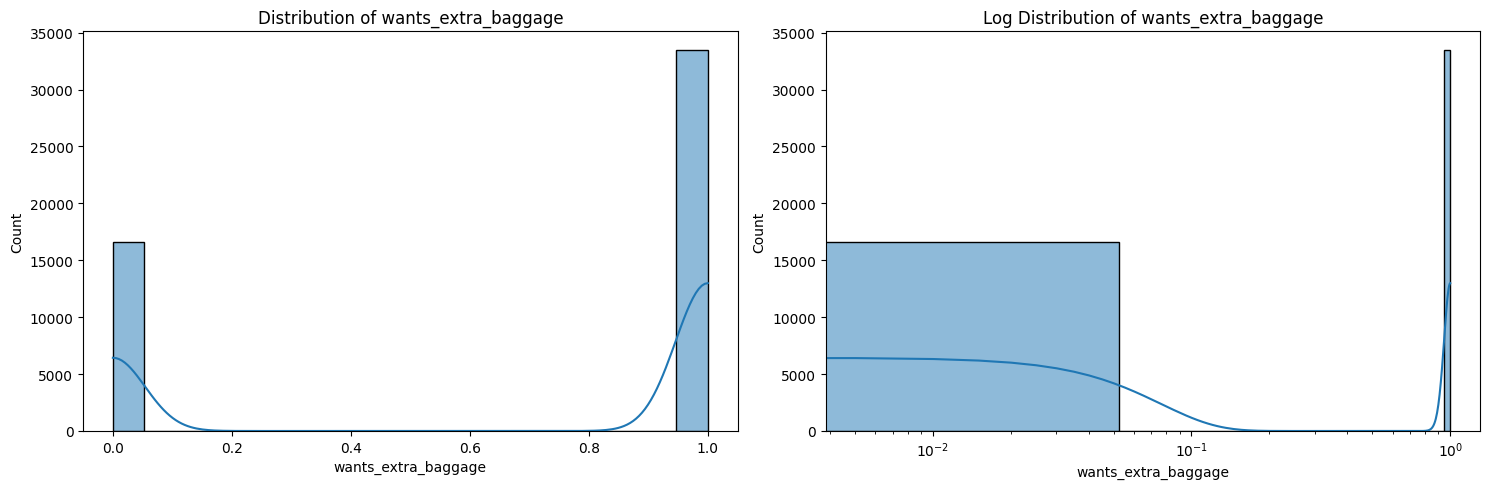

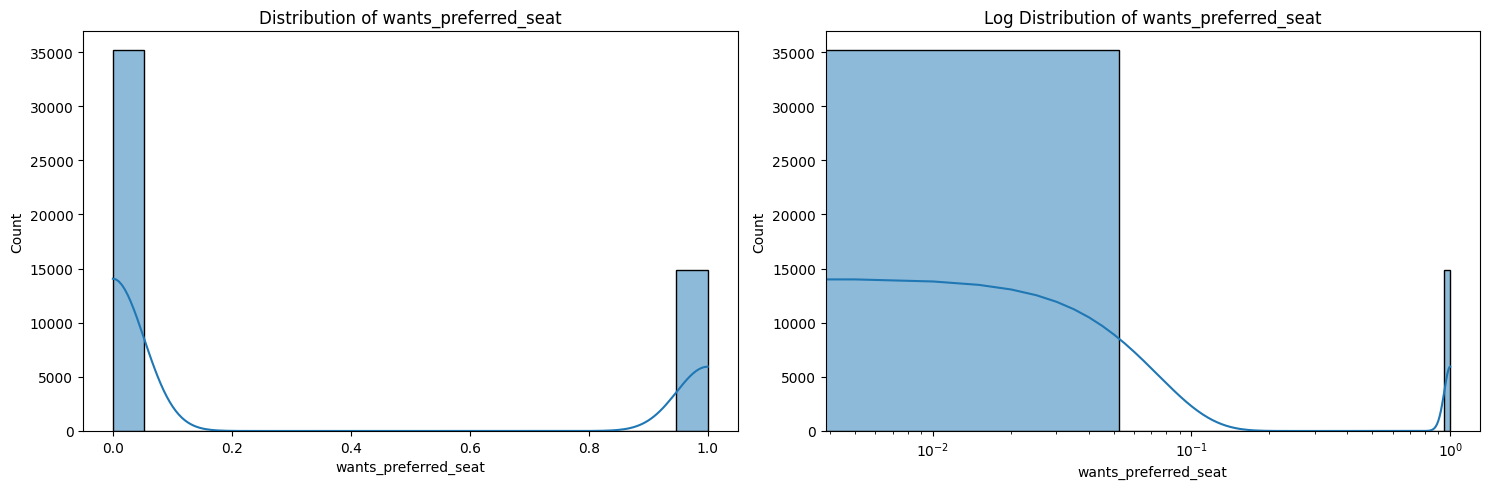

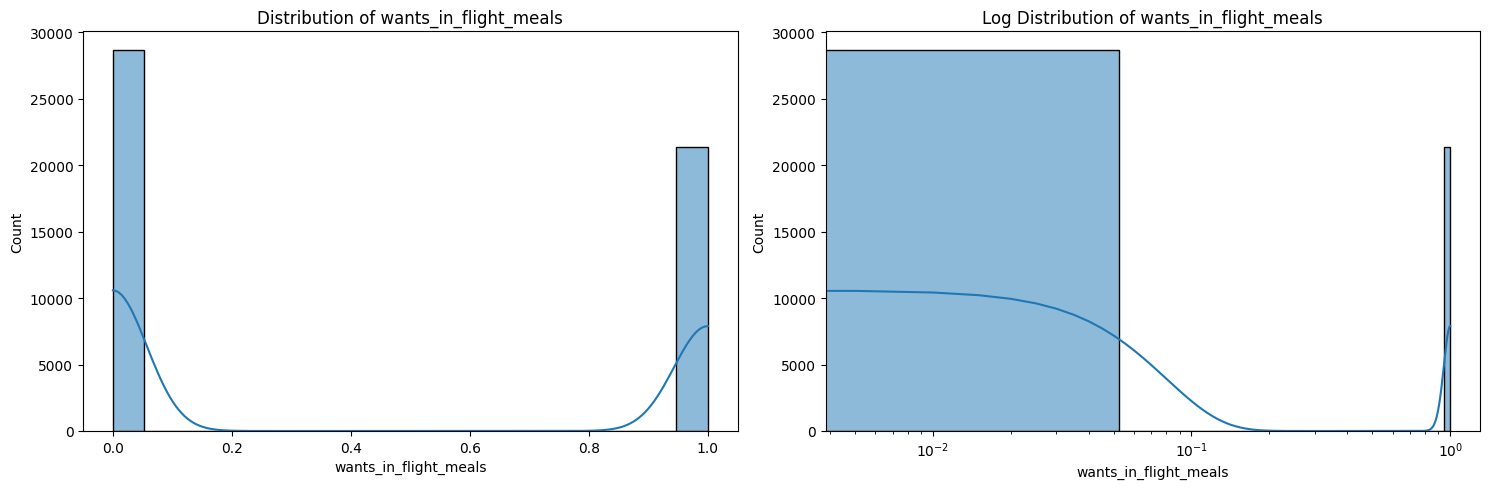

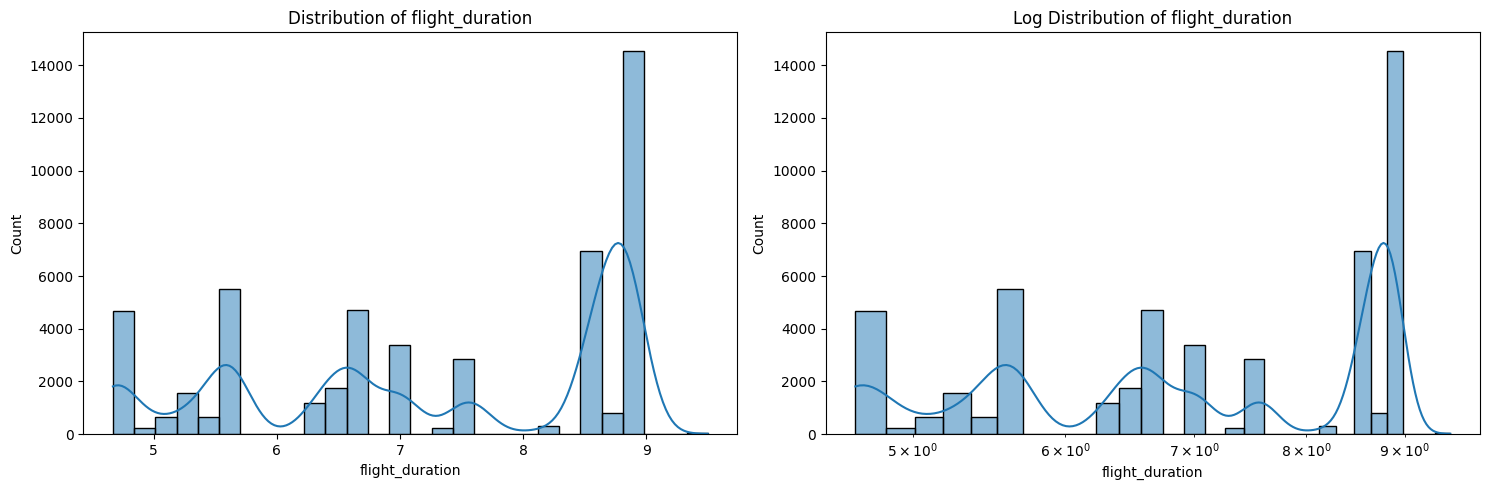

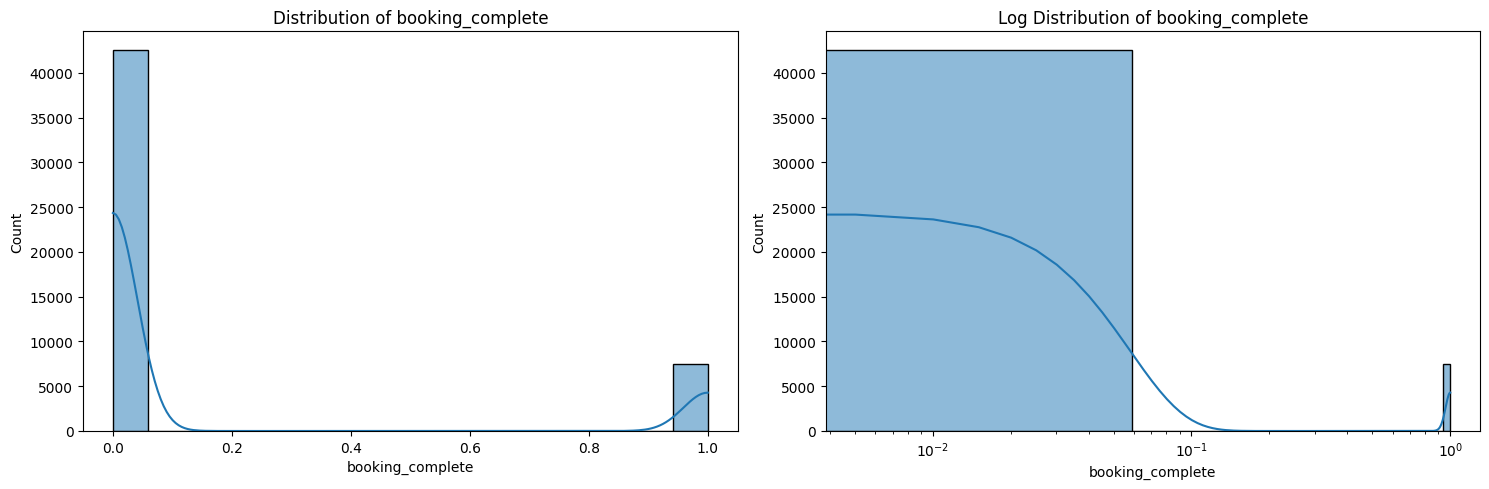

In [14]:
# Loop through creating a visual for numerical values
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='-', label='Median')
    plt.legend()
    plt.show()
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}\n")
# Box plot
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
    sns.histplot(df[col], kde=True, ax=ax1)
    ax1.set_title(f"Distribution of {col}")
    sns.boxplot(x=df[col], ax=ax2)
    plt.tight_layout()
    plt.show()
# Log scale
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[col], kde=True, ax=ax1)
    ax1.set_title(f"Distribution of {col}")
    sns.histplot(df[col], kde=True, ax=ax2)
    ax2.set_xscale('log')
    ax2.set_title(f"Log Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [15]:
print(df['sales_channel'].unique())

['Internet' 'Mobile']


booking_complete
0    42522
1     7478
Name: count, dtype: int64
booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64


/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_24443/1862994895.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_complete', data=df, palette='viridis')


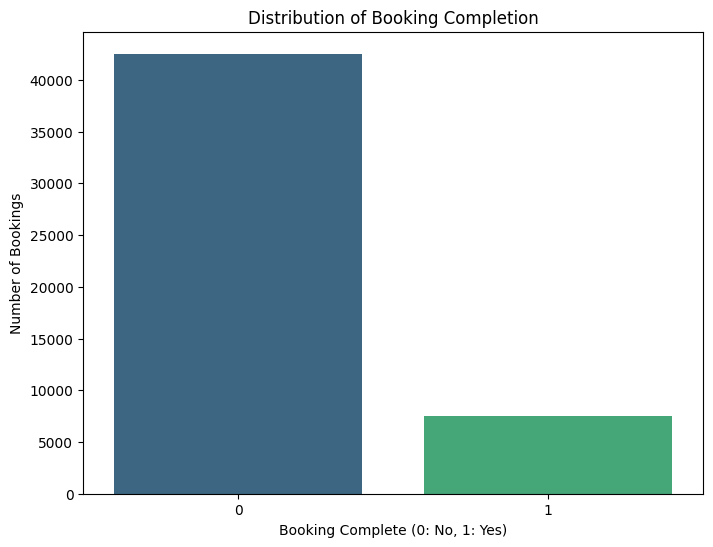

In [16]:
# Identify booking counts
booking_counts = df['booking_complete'].value_counts()
print(booking_counts)

# Identify the percentages
booking_percentage = df['booking_complete'].value_counts(normalize=True)*100
print(booking_percentage)

#visualize the distribution
plt.figure(figsize=(8,6))
sns.countplot(x='booking_complete', data=df, palette='viridis')
plt.title('Distribution of Booking Completion')
plt.xlabel('Booking Complete (0: No, 1: Yes)')
plt.ylabel('Number of Bookings')
plt.show()

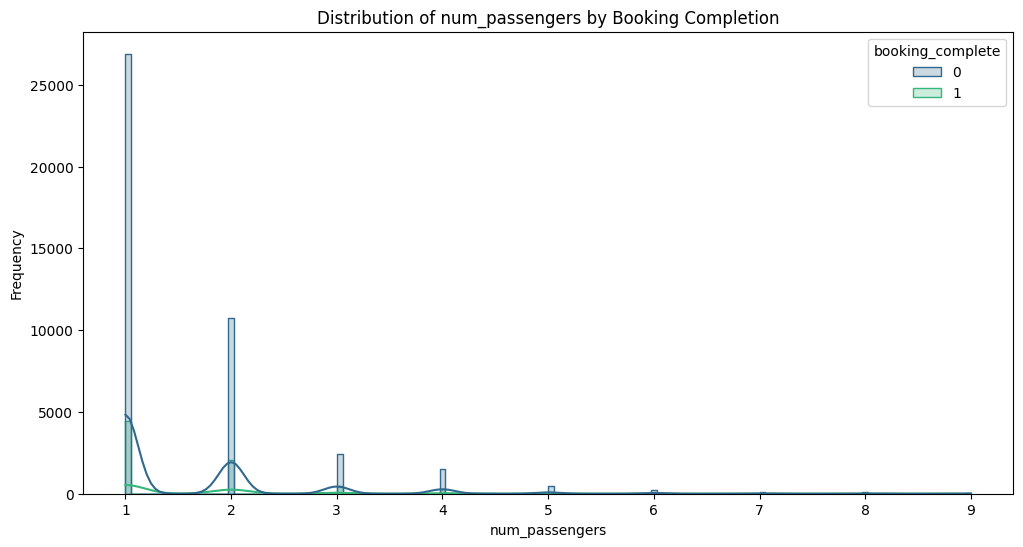

/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_24443/241115145.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y=feature, data=df, palette='viridis')


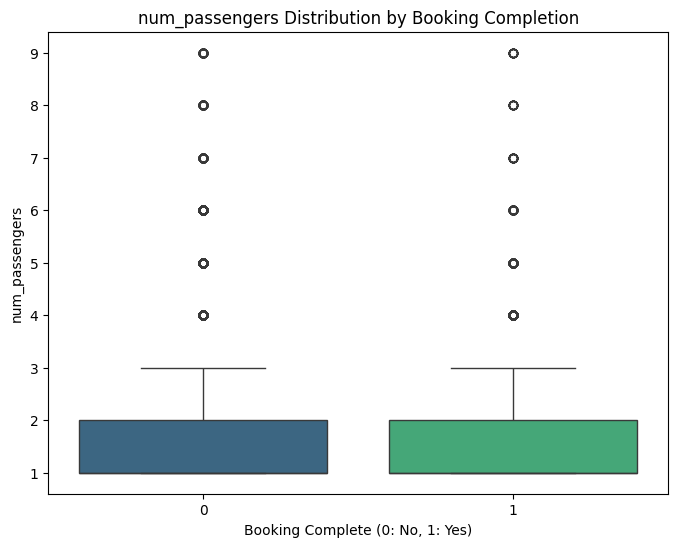

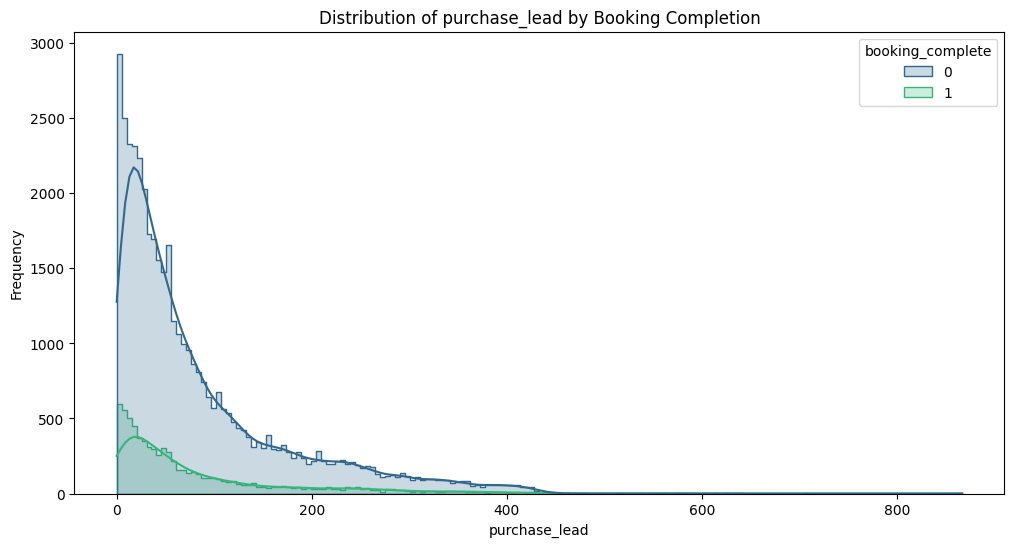

/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_24443/241115145.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y=feature, data=df, palette='viridis')


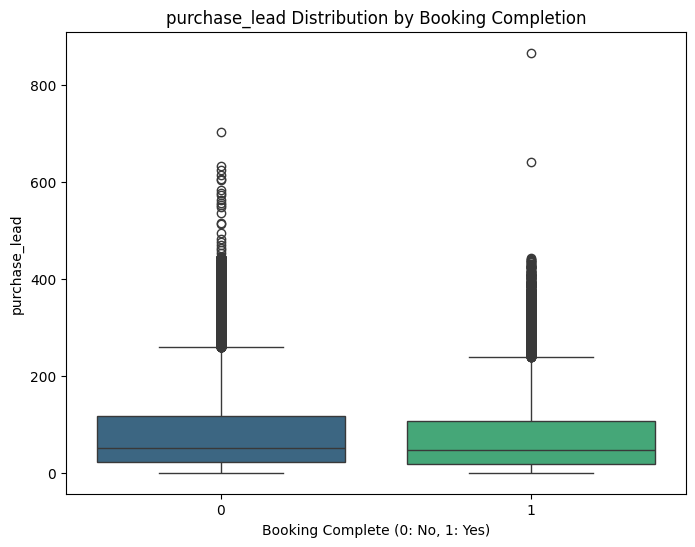

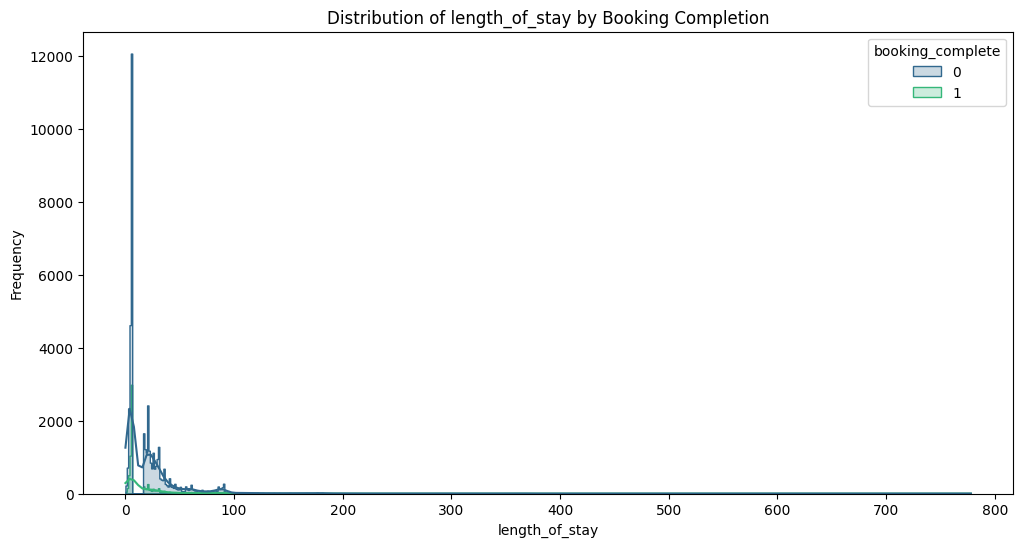

/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_24443/241115145.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y=feature, data=df, palette='viridis')


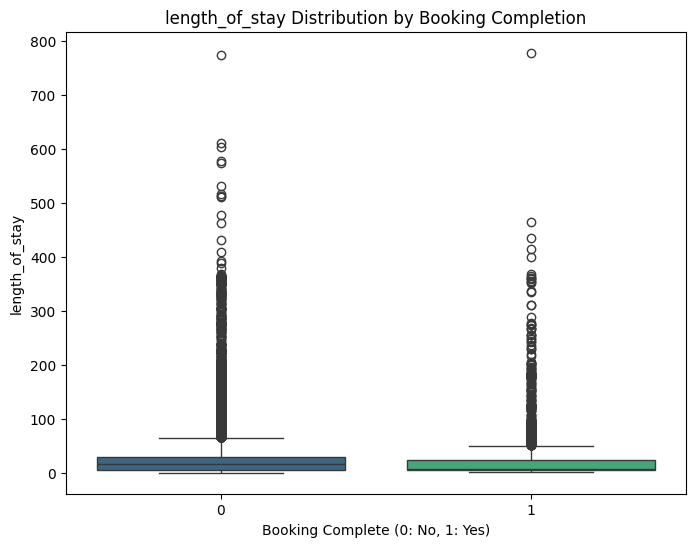

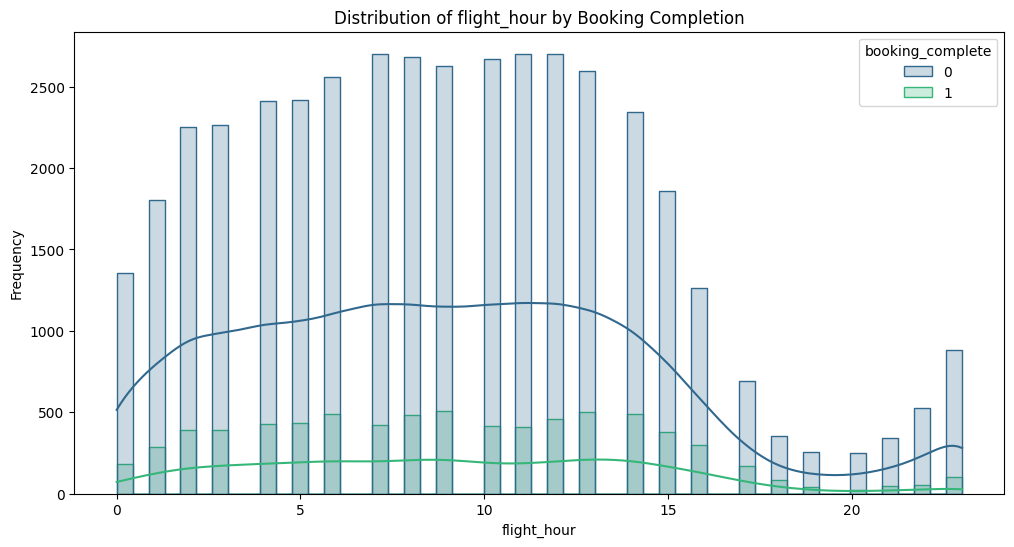

/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_24443/241115145.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y=feature, data=df, palette='viridis')


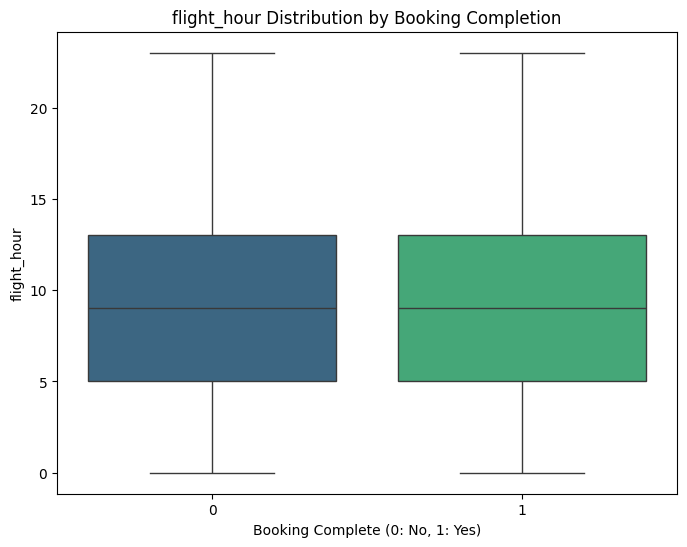

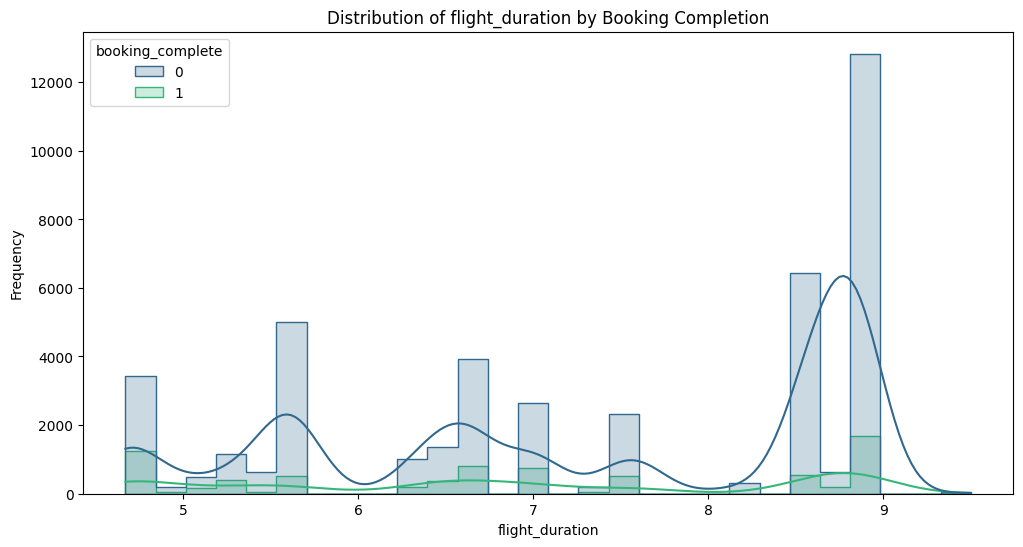

/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_24443/241115145.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y=feature, data=df, palette='viridis')


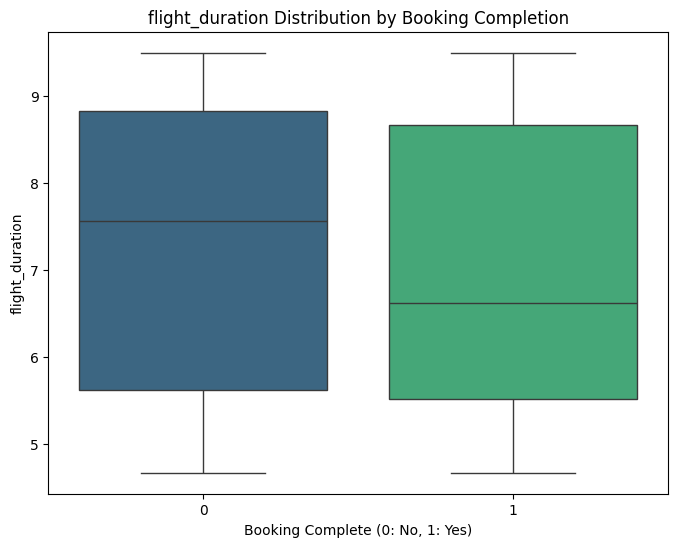

In [17]:
# EDA on numerical features
numer_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 
'flight_hour', 'flight_duration']

# For loop for numerical features
for feature in numer_features:
    plt.figure(figsize=(12,6))

    # Plot the distribution for completed Vs. uncompleted bookings
    sns.histplot(data=df, x=feature, hue= 'booking_complete', kde=True,
element="step", palette='viridis')
    plt.title(f'Distribution of {feature} by Booking Completion')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot for comparing distributions 
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='booking_complete', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} Distribution by Booking Completion')
    plt.xlabel('Booking Complete (0: No, 1: Yes)')
    plt.ylabel(feature) 
    plt.show()   

<Figure size 1200x600 with 0 Axes>

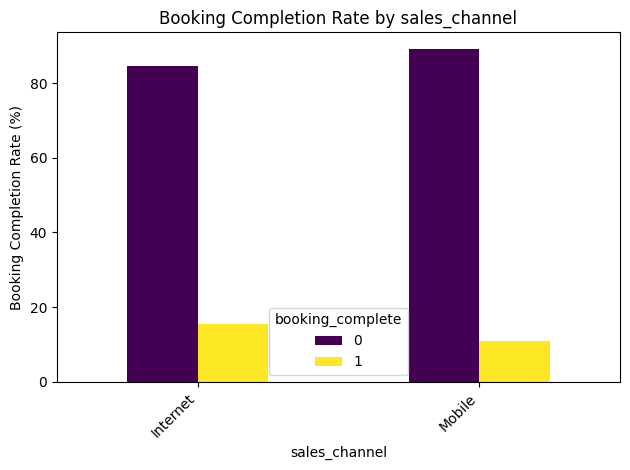

<Figure size 1200x600 with 0 Axes>

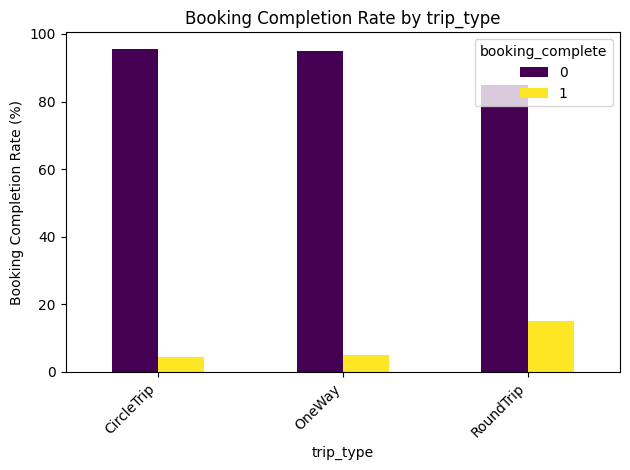

<Figure size 1200x600 with 0 Axes>

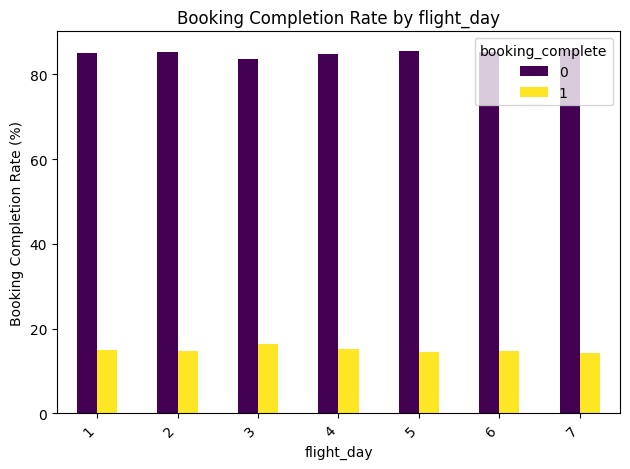

<Figure size 1200x600 with 0 Axes>

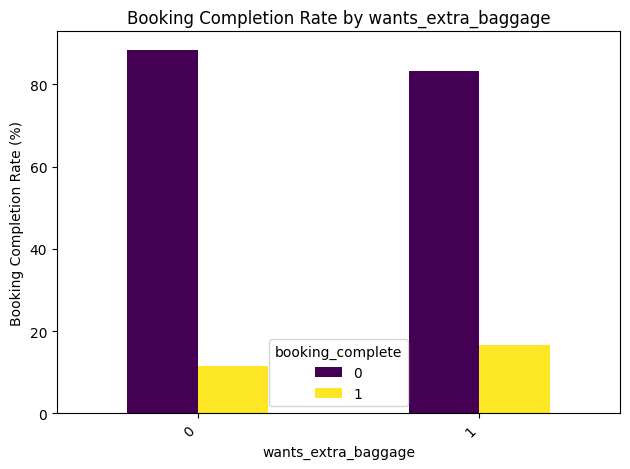

<Figure size 1200x600 with 0 Axes>

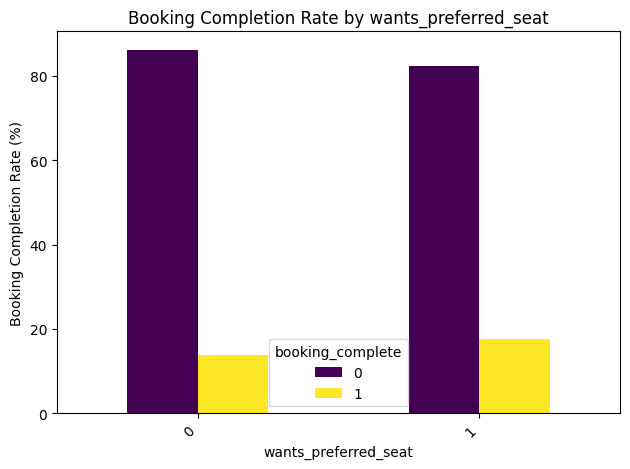

<Figure size 1200x600 with 0 Axes>

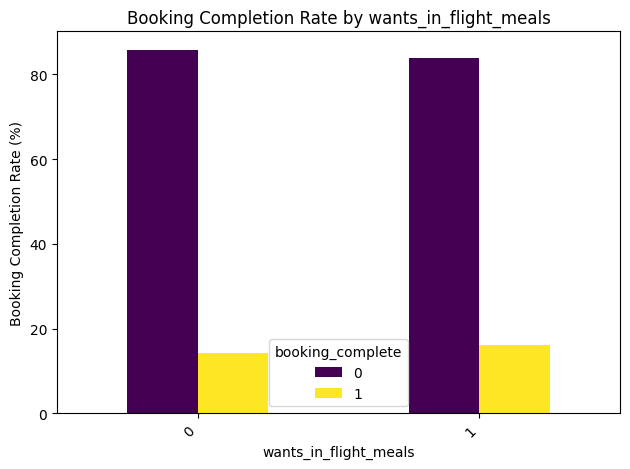

In [18]:
# EDA on categorical features
categorical_features = ['sales_channel', 'trip_type', 'flight_day',
'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))

    # Create a contingency table (cross-tabulation)
    cross_tab = pd.crosstab(df[feature], df['booking_complete'])

    # Normalize to get percentages
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Plot the percentages
    cross_tab_percent.plot(kind='bar', stacked=False, colormap='viridis')
    plt.title(f'Booking Completion Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Booking Completion Rate (%)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


   flight_day  booking_complete
0           1          0.148605
1           2          0.147139
2           3          0.163148
3           4          0.151131
4           5          0.145393
5           6          0.148142
6           7          0.141440


/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_24443/4163678373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='flight_day', y='booking_complete', data=day_completion_rate, palette='viridis')


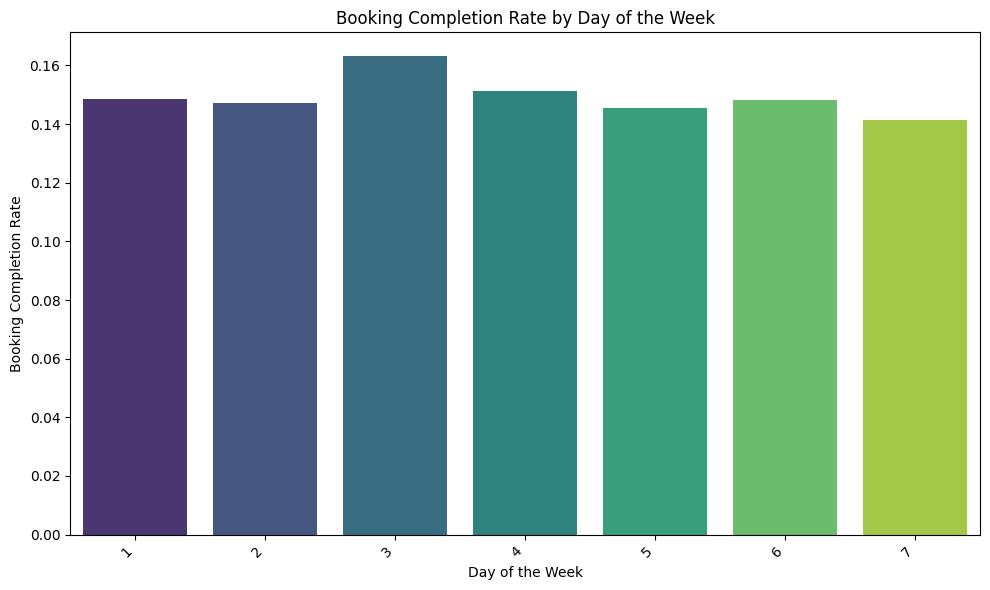

In [19]:
# Time based analysis on booking completion and day of the week
day_completion_rate = df.groupby('flight_day')['booking_complete'].mean().reset_index()

# Result
print(day_completion_rate)

# Visualize the booking completion rate by day of the week
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(x='flight_day', y='booking_complete', data=day_completion_rate, palette='viridis')
plt.title('Booking Completion Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Booking Completion Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

                 num_passengers  purchase_lead  length_of_stay  flight_hour  \
num_passengers         1.000000       0.212606       -0.115850     0.015607   
purchase_lead          0.212606       1.000000       -0.076560     0.035973   
length_of_stay        -0.115850      -0.076560        1.000000    -0.024872   
flight_hour            0.015607       0.035973       -0.024872     1.000000   
flight_duration       -0.063169       0.067866        0.141181    -0.002101   

                 flight_duration  
num_passengers         -0.063169  
purchase_lead           0.067866  
length_of_stay          0.141181  
flight_hour            -0.002101  
flight_duration         1.000000  


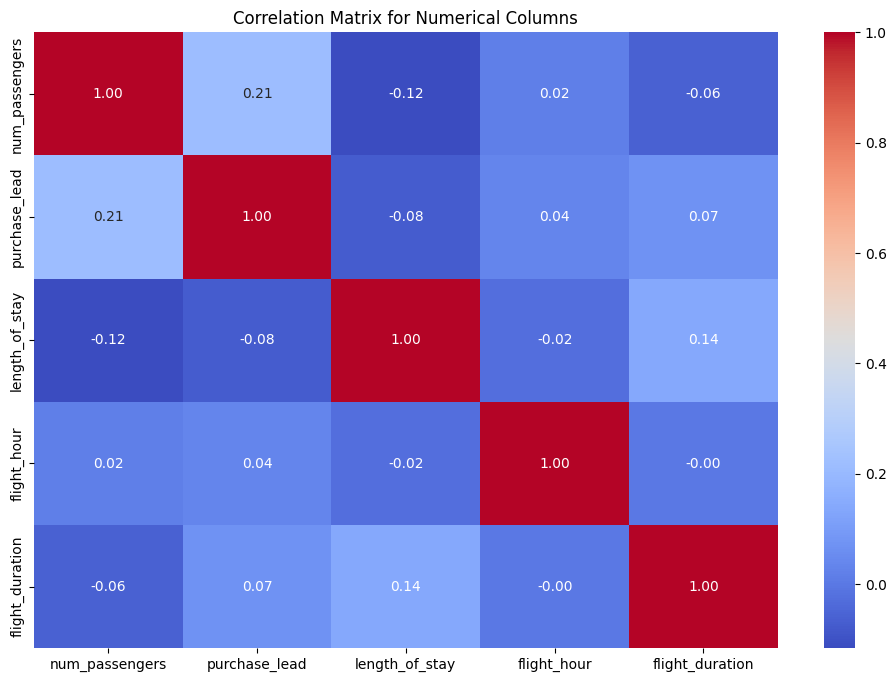

In [20]:
# Correlation Analysis with numerical variables
correlation_matrix = df[numer_features].corr()
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f",
cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

In [21]:
print(df['wants_extra_baggage'].unique())
print(df['wants_preferred_seat'].unique())
print(df['wants_in_flight_meals'].unique())

[1 0]
[0 1]
[0 1]


In [22]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,1,0,1,5.52,0


### Feature Engineering

In [23]:
# Create an 'is_weekend' feature (1 for Sat/Sun, 0 otherwise)
df['is_weekend'] = df['flight_day'].apply(lambda x:1 if x in [6,7] else 0)
# Validate
print(df[['flight_day', 'is_weekend']].head())

   flight_day  is_weekend
0           6           1
1           6           1
2           3           0
3           6           1
4           3           0


In [24]:
# Extract time peroiods from the flight_hour column to borader periods
# Define time periods
bins = [0, 5, 12, 17, 21, 24]
labels = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']

# Create 'flight_period' column
df['flight_period'] = pd.cut(df['flight_hour'], bins=bins,
labels=labels, right=False)

# Validate feature
print(df['flight_period'].value_counts())

flight_period
Morning       21519
Afternoon     12888
Late Night    11768
Night          1954
Evening        1871
Name: count, dtype: int64


In [38]:
print(df['flight_period'].unique())

['Morning', 'Late Night', 'Evening', 'Afternoon', 'Night']
Categories (5, object): ['Late Night' < 'Morning' < 'Afternoon' < 'Evening' < 'Night']


In [25]:
# 'last_minute_booking' feature 
# purchase_lead column less than or equal to 7 means booking is last minute = 1
df['last_minute_booking'] = np.where(df['purchase_lead'] <= 7, 1, 0) 
# Validate
print(df['last_minute_booking'].value_counts())


last_minute_booking
0    45187
1     4813
Name: count, dtype: int64


In [26]:
# Categorize length of stay 
df['length_of_stay_category'] = pd.qcut(
    df['length_of_stay'],
    q=[0, 0.25, 0.75, 1],
    labels=['short', 'medium', 'long']
)
# Validate
print(df['length_of_stay_category'].value_counts())

length_of_stay_category
medium    20752
short     16916
long      12332
Name: count, dtype: int64


In [29]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,flight_period,last_minute_booking,length_of_stay_category
0,2,Internet,RoundTrip,262,19,7,6,1,0,0,5.52,0,1,Morning,0,medium
1,1,Internet,RoundTrip,112,20,3,6,0,0,0,5.52,0,1,Late Night,0,medium
2,2,Internet,RoundTrip,243,22,17,3,1,1,0,5.52,0,0,Evening,0,medium
3,1,Internet,RoundTrip,96,31,4,6,0,0,1,5.52,0,1,Late Night,0,long
4,2,Internet,RoundTrip,68,22,15,3,1,0,1,5.52,0,0,Afternoon,0,medium


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
# Prepare data modeling
X = df.drop(columns=['booking_complete'])
Y = df['booking_complete']

# Seperate categorical and numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Convert 'category' columns to 'object'
X['flight_period'] = X['flight_period'].astype(str)
X['length_of_stay_category'] = X['length_of_stay_category'].astype(str)

# Re-identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Ensure all categorical columns are treated as strings
X[categorical_cols] = X[categorical_cols].astype(str)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train RandomForest model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced', # handles the class imbalance 
        random_state=42
    ))
])

# Train the model
model.fit(X_train, Y_train)

# Make predictions and evaluate
Y_pred = model.predict(X_test)

# Prediction for AUC calculation
Y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
auc_score = roc_auc_score(Y_test, Y_pred_proba)

print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")
print(f"AUC Score: {auc_score:.2f}")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.85
AUC Score: 0.65
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.42      0.05      0.10      1480

    accuracy                           0.85     10000
   macro avg       0.64      0.52      0.51     10000
weighted avg       0.79      0.85      0.80     10000



The model seems to perform well for the class 0, but poorly for class 1. There is still an imbalance, and the SMOTE technique will be utilized to handle the imbalance.

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Preprocess the data (numerical and categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Apply preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_preprocessed, Y_train)

# Check the class distribution after SMOTE
print("Class distribution before SMOTE:", Y_train.value_counts())
print("Class distribution after SMOTE:", pd.Series(Y_train_resampled).value_counts())

# Train the model with the resampled data
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Fit the model
model.fit(X_train_resampled, Y_train_resampled)

# Make predictions and evaluate
Y_pred = model.predict(X_test_preprocessed)
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")
print(classification_report(Y_test, Y_pred))

/Users/isaganijulian/Desktop/Python_Work_Space/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class distribution before SMOTE: booking_complete
0    34002
1     5998
Name: count, dtype: int64
Class distribution after SMOTE: booking_complete
0    34002
1    34002
Name: count, dtype: int64
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8520
           1       0.31      0.12      0.18      1480

    accuracy                           0.83     10000
   macro avg       0.59      0.54      0.54     10000
weighted avg       0.78      0.83      0.80     10000



# Feature Importance

           Feature  Importance
2   length_of_stay    0.173401
8  flight_duration    0.169876
1    purchase_lead    0.150001
3      flight_hour    0.126525
4       flight_day    0.115498


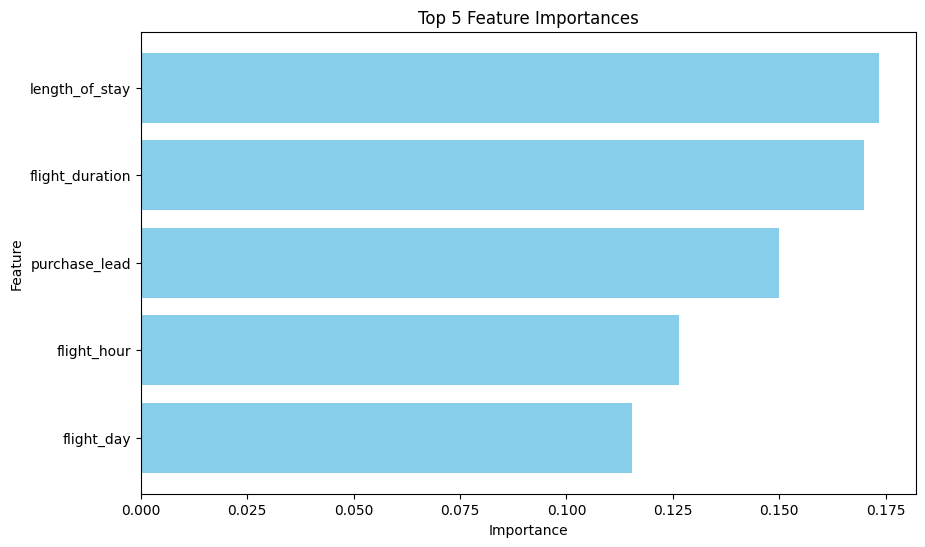

In [61]:
# Identify features from the preprocessor
categorical_features_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, categorical_features_names])

# Get feature importances from trained RandomeForest model 
feature_importances = model.feature_importances_

# Create DF from feature importances
importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
print(importances_df.head(5))

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(importances_df['Feature'][:5], importances_df['Importance'][:5], color='skyblue')
plt.gca().invert_yaxis() # Invert the Y-Axis to show the most important feature at the top
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
